In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
%matplotlib inline

In [159]:
pd.set_option("display.max_rows",150)

In [3]:
#Reading_Dataset
df = pd.read_csv("hepatitis_csv.csv")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [9]:
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [7]:
#dimension of dataset
df.shape

(155, 20)

In [5]:
#Missing_values
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [8]:
#Most of the variables are in categorical 
df.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [10]:
numerical_data = df.select_dtypes(include=['int64','float64','int32','float32'])

In [11]:
numerical_data

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


In [42]:
numerical_data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [12]:
categorical_data = df.select_dtypes(include=['object','bool'])

In [14]:
# separating categorical_data from the dataset
categorical_data

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,male,False,False,False,False,False,False,False,False,False,False,False,False,live
1,female,False,False,True,False,False,False,False,False,False,False,False,False,live
2,female,True,False,True,False,False,True,False,False,False,False,False,False,live
3,female,NaN,True,False,False,False,True,False,False,False,False,False,False,live
4,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,female,True,False,True,True,True,True,False,False,True,True,True,True,die
151,female,True,False,True,False,False,True,True,False,False,False,False,True,live
152,female,False,False,True,True,False,False,True,False,True,False,False,True,live
153,male,False,False,True,False,False,True,False,True,True,False,True,True,live


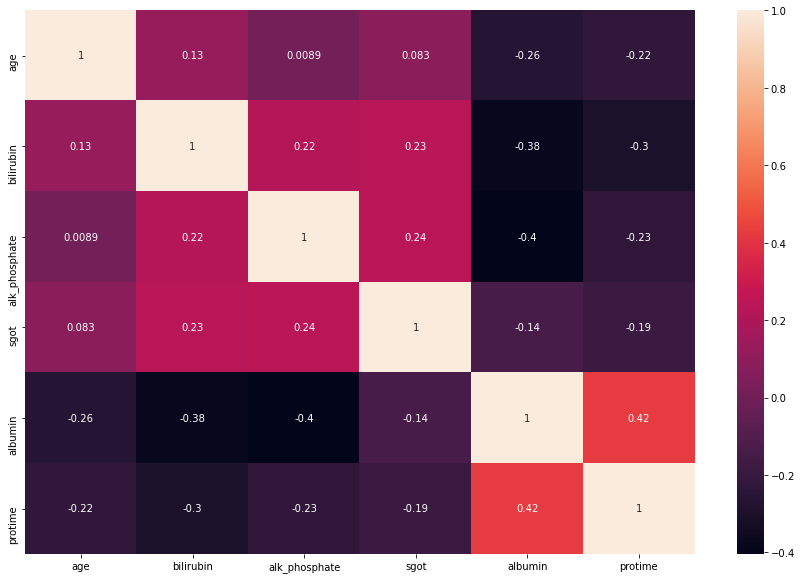

In [41]:
#Correlation Plot
plt.figure(figsize=(15,10))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [32]:
#value counts of each variables
for i in categorical_data.columns:
    print("variable-->",i,'\n')
    print(categorical_data[i].value_counts())
    print("\n")

variable--> sex 

female    139
male       16
Name: sex, dtype: int64


variable--> steroid 

True     78
False    76
Name: steroid, dtype: int64


variable--> antivirals 

False    131
True      24
Name: antivirals, dtype: int64


variable--> fatigue 

True     100
False     54
Name: fatigue, dtype: int64


variable--> malaise 

False    93
True     61
Name: malaise, dtype: int64


variable--> anorexia 

False    122
True      32
Name: anorexia, dtype: int64


variable--> liver_big 

True     120
False     25
Name: liver_big, dtype: int64


variable--> liver_firm 

False    84
True     60
Name: liver_firm, dtype: int64


variable--> spleen_palpable 

False    120
True      30
Name: spleen_palpable, dtype: int64


variable--> spiders 

False    99
True     51
Name: spiders, dtype: int64


variable--> ascites 

False    130
True      20
Name: ascites, dtype: int64


variable--> varices 

False    132
True      18
Name: varices, dtype: int64


variable--> histology 

False    85
True    

In [35]:
#percentage of each class
for i in categorical_data.columns:
    print("variable-->",i,"---Percentage---"'\n')
    print(categorical_data[i].value_counts()*100/df.shape[0])
    print("\n")

variable--> sex ---Percentage---

female    89.677419
male      10.322581
Name: sex, dtype: float64


variable--> steroid ---Percentage---

True     50.322581
False    49.032258
Name: steroid, dtype: float64


variable--> antivirals ---Percentage---

False    84.516129
True     15.483871
Name: antivirals, dtype: float64


variable--> fatigue ---Percentage---

True     64.516129
False    34.838710
Name: fatigue, dtype: float64


variable--> malaise ---Percentage---

False    60.000000
True     39.354839
Name: malaise, dtype: float64


variable--> anorexia ---Percentage---

False    78.709677
True     20.645161
Name: anorexia, dtype: float64


variable--> liver_big ---Percentage---

True     77.419355
False    16.129032
Name: liver_big, dtype: float64


variable--> liver_firm ---Percentage---

False    54.193548
True     38.709677
Name: liver_firm, dtype: float64


variable--> spleen_palpable ---Percentage---

False    77.419355
True     19.354839
Name: spleen_palpable, dtype: float64




In [37]:
import warnings
warnings.filterwarnings("ignore")

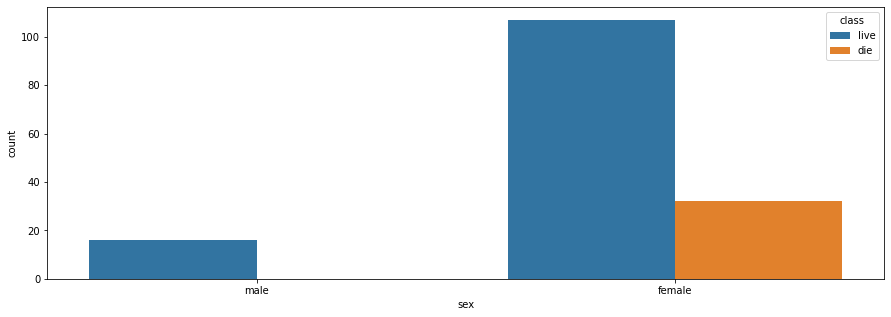

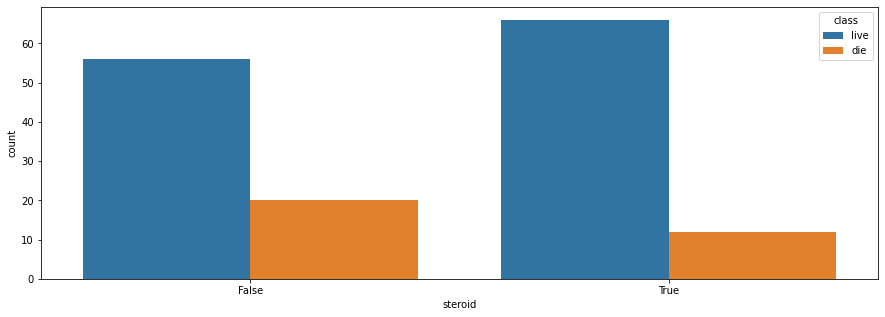

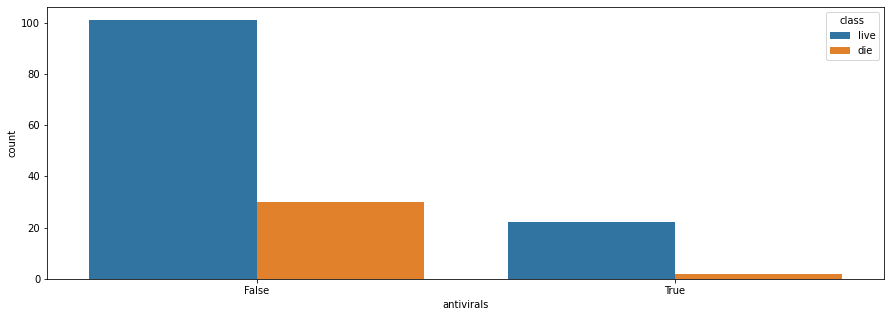

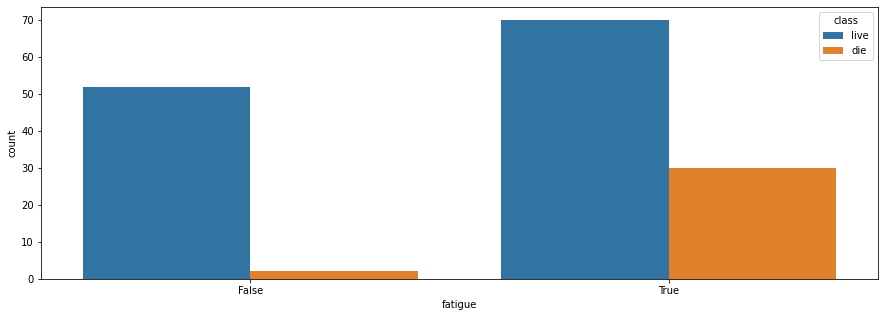

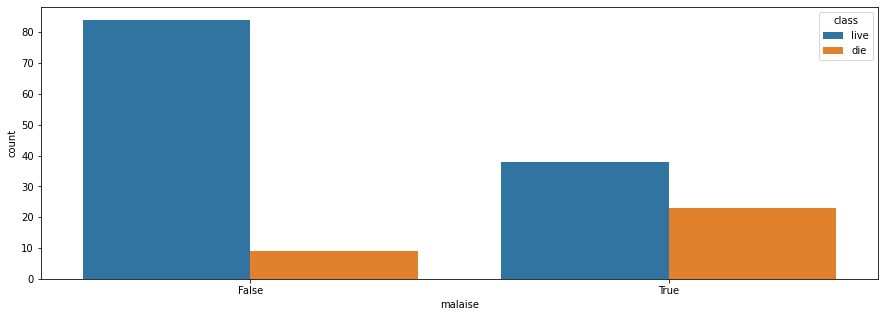

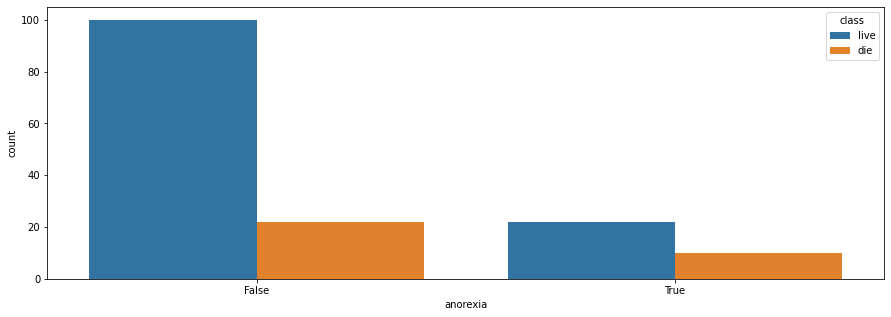

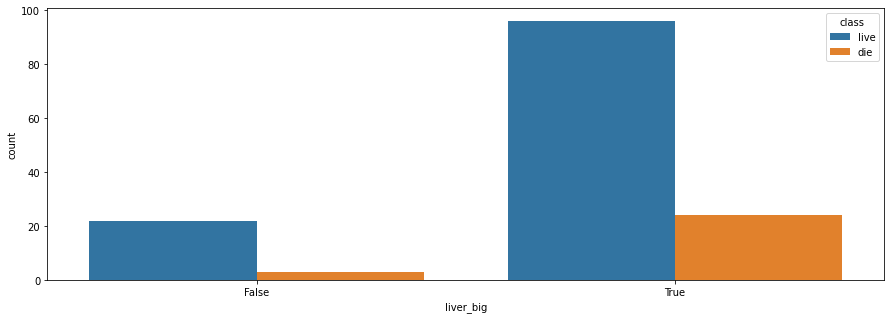

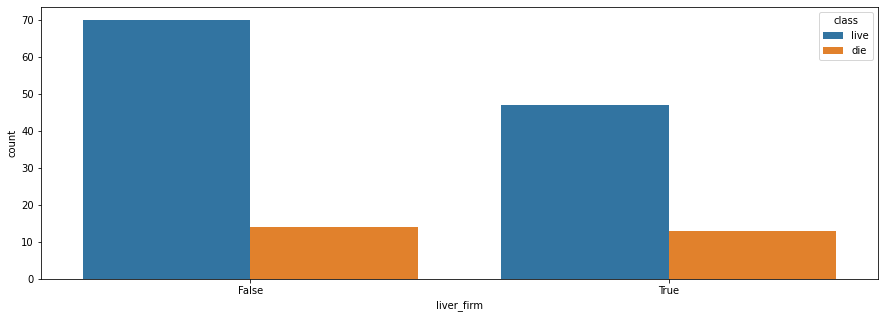

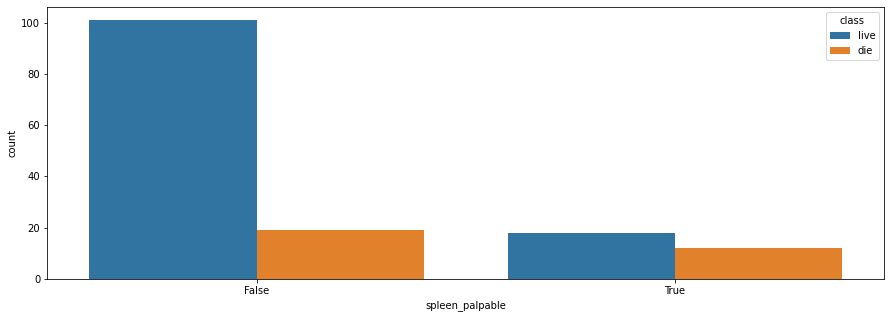

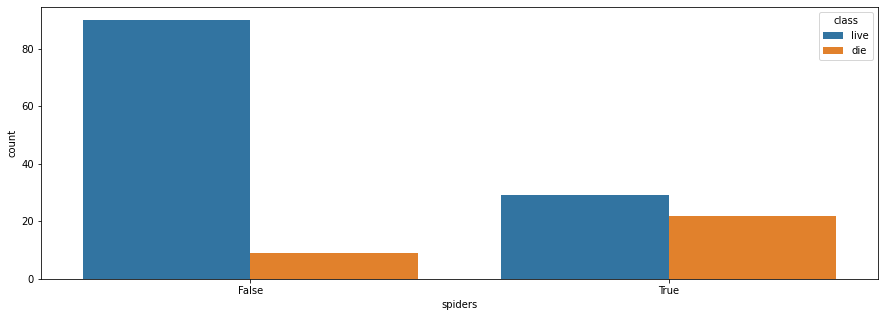

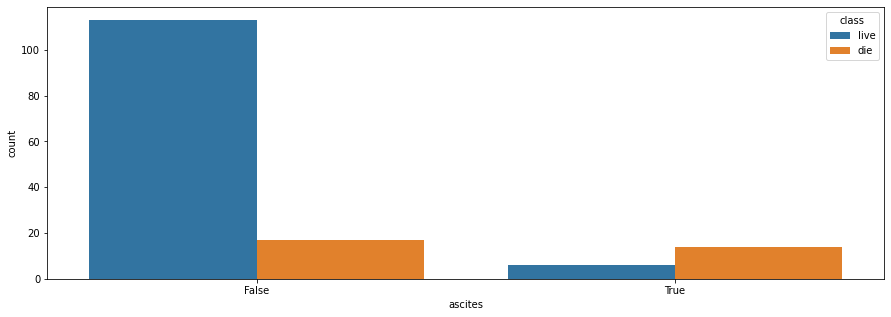

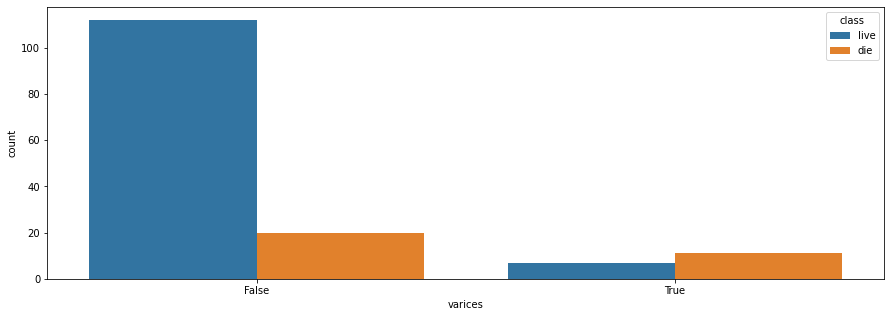

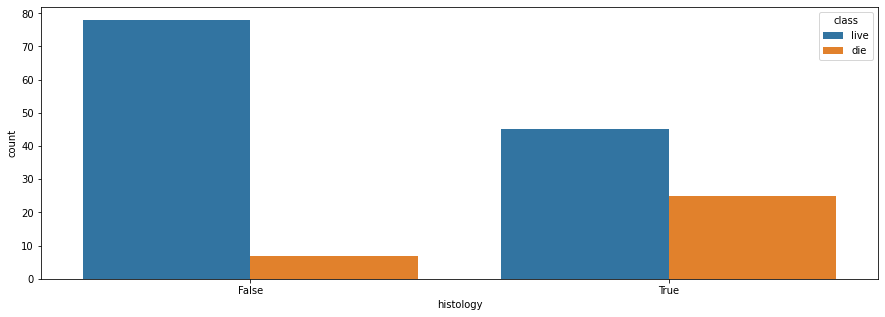

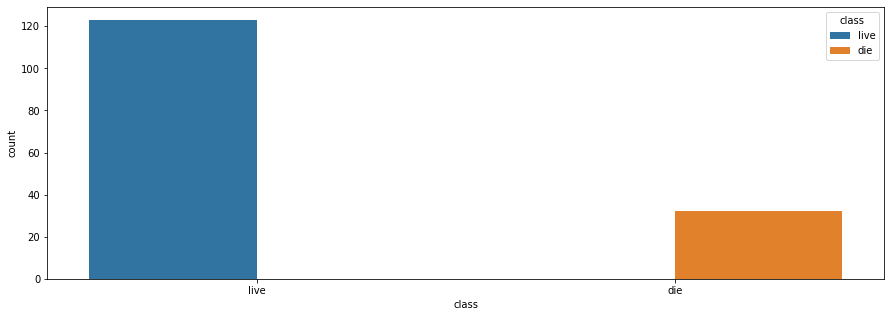

In [49]:
#Plot 
for i in categorical_data.columns:
    plt.figure(figsize=(15,5))
    sns.countplot(categorical_data[i],hue= df['class'])
    plt.show()

In [55]:
numerical_data

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85.0,18.0,4.0,NaN
1,50,0.9,135.0,42.0,3.5,NaN
2,78,0.7,96.0,32.0,4.0,NaN
3,31,0.7,46.0,52.0,4.0,80.0
4,34,1.0,NaN,200.0,4.0,NaN
...,...,...,...,...,...,...
150,46,7.6,NaN,242.0,3.3,50.0
151,44,0.9,126.0,142.0,4.3,NaN
152,61,0.8,75.0,20.0,4.1,NaN
153,53,1.5,81.0,19.0,4.1,48.0


### AGE

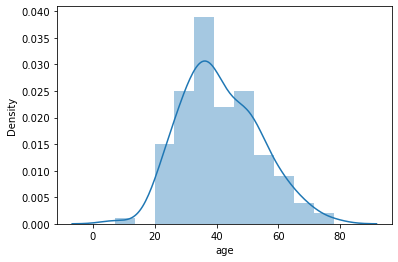

In [57]:
sns.distplot(df['age'])
plt.show()

In [65]:
if df['age'].mean() > df['age'].median():
    print("Right skewness")
else:
    print("Left skewness")

Right skewness


### Bilirubin

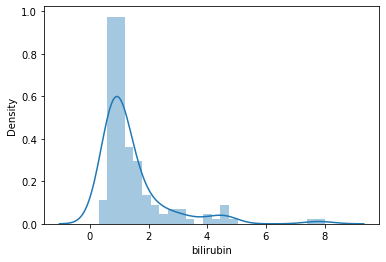

In [96]:
sns.distplot(df['bilirubin'])
plt.show()

### alk_phosphate

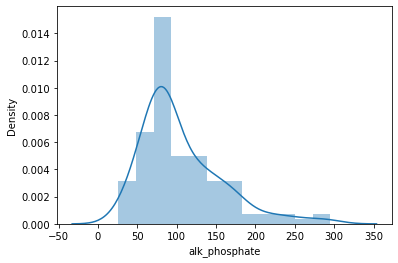

In [68]:
sns.distplot(df['alk_phosphate'])
plt.show()

In [69]:
if df['alk_phosphate'].mean() > df['alk_phosphate'].median():
    print("Right skewness")
else:
    print("Left skewness")

Right skewness


### Sgot

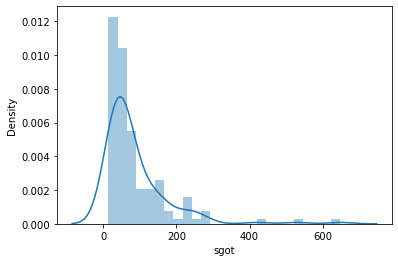

In [71]:
sns.distplot(df['sgot'])
plt.show()

### Albumin

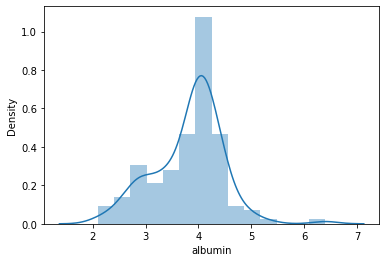

In [74]:
sns.distplot(df['albumin'])
plt.show()

### Protime

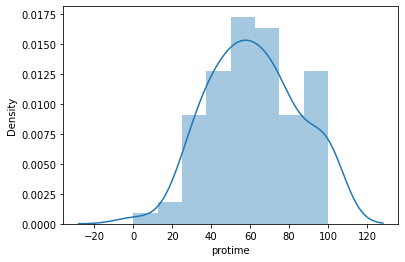

In [76]:
sns.distplot(df['protime'])
plt.show()

In [70]:
numerical_data.columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

### Missing Values

In [110]:
df2 = pd.read_csv("hep_impute.csv")

In [111]:
df2.drop("Unnamed: 0",axis=1,inplace=True)

###  imputed in r using PMM method

In [106]:
df2

,Unnamed: 0,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,...,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,1,30,male,False,False,False,False,False,False,False,...,False,False,False,1.0,85,18,4.0,50,False,live
1,2,50,female,False,False,True,False,False,False,False,...,False,False,False,0.9,135,42,3.5,41,False,live
2,3,78,female,True,False,True,False,False,True,False,...,False,False,False,0.7,96,32,4.0,46,False,live
3,4,31,female,False,True,False,False,False,True,False,...,False,False,False,0.7,46,52,4.0,80,False,live
4,5,34,female,True,False,False,False,False,True,False,...,False,False,False,1.0,215,200,4.0,31,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,46,female,True,False,True,True,True,True,False,...,True,True,True,7.6,109,242,3.3,50,True,die
151,152,44,female,True,False,True,False,False,True,True,...,False,False,False,0.9,126,142,4.3,50,True,live
152,153,61,female,False,False,True,True,False,False,True,...,True,False,False,0.8,75,20,4.1,31,True,live
153,154,53,male,False,False,True,False,False,True,False,...,True,False,True,1.5,81,19,4.1,48,True,live


In [112]:
df2

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,50,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,41,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,46,False,live
3,31,female,False,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,215,200,4.0,31,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,109,242,3.3,50,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,50,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,31,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81,19,4.1,48,True,live


### PMM Imputer 
<h4>Why PMM ?</h4>
<p style="text-align:justify" onMouseOver="this.style.color='red'">
    <b>PMM</b> produces imputed values that are far more like real values. If the  variable value is <i><b>skewed</b></i> in the dataset, then imputed values also will be <i><b>skewed</b></i> . If the first variable is bounded by 0 and 100, the imputed values also will be bounded by 0 and 100. And if the important values are discrete (like number of children), the imputed values also will be discrete. That’s because the imputed values are real values that are <i><b>“borrowed”</b></i> from individuals with real data.</p>

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          155 non-null    bool   
 3   antivirals       155 non-null    bool   
 4   fatigue          155 non-null    bool   
 5   malaise          155 non-null    bool   
 6   anorexia         155 non-null    bool   
 7   liver_big        155 non-null    bool   
 8   liver_firm       155 non-null    bool   
 9   spleen_palpable  155 non-null    bool   
 10  spiders          155 non-null    bool   
 11  ascites          155 non-null    bool   
 12  varices          155 non-null    bool   
 13  bilirubin        155 non-null    float64
 14  alk_phosphate    155 non-null    int64  
 15  sgot             155 non-null    int64  
 16  albumin          155 non-null    float64
 17  protime         

In [120]:
df2.isna().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [122]:
numerical_data = df2.select_dtypes(include=['int64','float64','int32','float32'])

In [123]:
numerical_data.head()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85,18,4.0,50
1,50,0.9,135,42,3.5,41
2,78,0.7,96,32,4.0,46
3,31,0.7,46,52,4.0,80
4,34,1.0,215,200,4.0,31


In [126]:
categorical_data = df2.select_dtypes(include=['object','bool'])

In [127]:
categorical_data

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,male,False,False,False,False,False,False,False,False,False,False,False,False,live
1,female,False,False,True,False,False,False,False,False,False,False,False,False,live
2,female,True,False,True,False,False,True,False,False,False,False,False,False,live
3,female,False,True,False,False,False,True,False,False,False,False,False,False,live
4,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,female,True,False,True,True,True,True,False,False,True,True,True,True,die
151,female,True,False,True,False,False,True,True,False,False,False,False,True,live
152,female,False,False,True,True,False,False,True,False,True,False,False,True,live
153,male,False,False,True,False,False,True,False,True,True,False,True,True,live


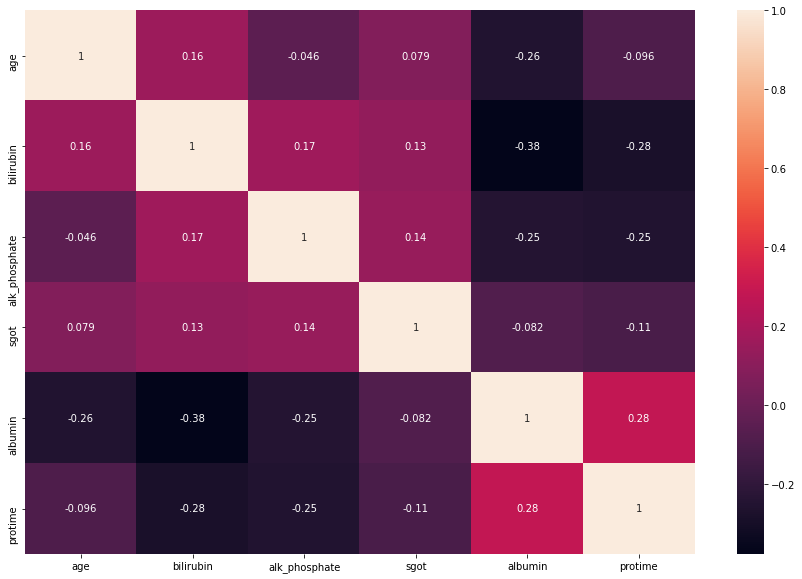

In [130]:
#Correlation plot
plt.figure(figsize=(15,10))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [131]:
#value counts of each variables
for i in categorical_data.columns:
    print("variable-->",i,'\n')
    print(categorical_data[i].value_counts())
    print("\n")

variable--> sex 

female    139
male       16
Name: sex, dtype: int64


variable--> steroid 

True     78
False    77
Name: steroid, dtype: int64


variable--> antivirals 

False    131
True      24
Name: antivirals, dtype: int64


variable--> fatigue 

True     100
False     55
Name: fatigue, dtype: int64


variable--> malaise 

False    94
True     61
Name: malaise, dtype: int64


variable--> anorexia 

False    123
True      32
Name: anorexia, dtype: int64


variable--> liver_big 

True     120
False     35
Name: liver_big, dtype: int64


variable--> liver_firm 

False    84
True     71
Name: liver_firm, dtype: int64


variable--> spleen_palpable 

False    122
True      33
Name: spleen_palpable, dtype: int64


variable--> spiders 

False    104
True      51
Name: spiders, dtype: int64


variable--> ascites 

False    134
True      21
Name: ascites, dtype: int64


variable--> varices 

False    135
True      20
Name: varices, dtype: int64


variable--> histology 

False    85
True  

In [132]:
#percentage of each class
for i in categorical_data.columns:
    print("variable-->",i,"---Percentage---"'\n')
    print(categorical_data[i].value_counts()*100/df2.shape[0])
    print("\n")

variable--> sex ---Percentage---

female    89.677419
male      10.322581
Name: sex, dtype: float64


variable--> steroid ---Percentage---

True     50.322581
False    49.677419
Name: steroid, dtype: float64


variable--> antivirals ---Percentage---

False    84.516129
True     15.483871
Name: antivirals, dtype: float64


variable--> fatigue ---Percentage---

True     64.516129
False    35.483871
Name: fatigue, dtype: float64


variable--> malaise ---Percentage---

False    60.645161
True     39.354839
Name: malaise, dtype: float64


variable--> anorexia ---Percentage---

False    79.354839
True     20.645161
Name: anorexia, dtype: float64


variable--> liver_big ---Percentage---

True     77.419355
False    22.580645
Name: liver_big, dtype: float64


variable--> liver_firm ---Percentage---

False    54.193548
True     45.806452
Name: liver_firm, dtype: float64


variable--> spleen_palpable ---Percentage---

False    78.709677
True     21.290323
Name: spleen_palpable, dtype: float64




In [174]:
categorical_data

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology,class
0,male,False,False,False,False,False,False,False,False,False,False,False,False,live
1,female,False,False,True,False,False,False,False,False,False,False,False,False,live
2,female,True,False,True,False,False,True,False,False,False,False,False,False,live
3,female,False,True,False,False,False,True,False,False,False,False,False,False,live
4,female,True,False,False,False,False,True,False,False,False,False,False,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,female,True,False,True,True,True,True,False,False,True,True,True,True,die
151,female,True,False,True,False,False,True,True,False,False,False,False,True,live
152,female,False,False,True,True,False,False,True,False,True,False,False,True,live
153,male,False,False,True,False,False,True,False,True,True,False,True,True,live


### Gender

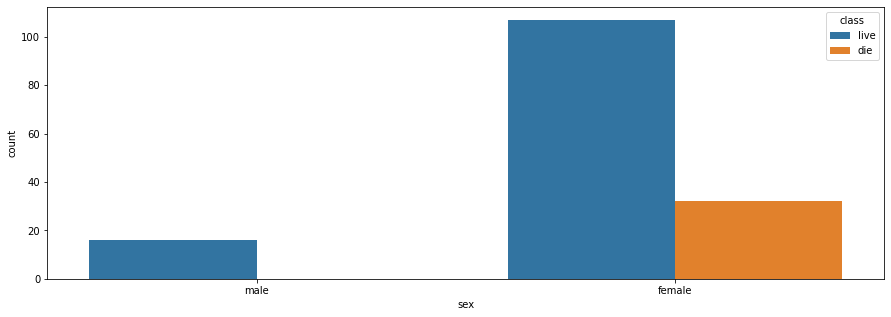

In [175]:
plt.figure(figsize=(15,5))
sns.countplot(x='sex',data = df2, hue = 'class')
plt.show()

###  Live Status
<b>count</b> : Male - 16 and female - 139 <br>
<b>percentage </b> : Male - 10% , female - 90% <br>
<b>die</b>  : <i> 32 females are died out of 139 </i> <br>
<b>die percentage</b> : <i> Female died percentage - 23.02 % </i> <br>

In [204]:
categorical_data.groupby(["sex"])["fatigue"].value_counts()

sex     fatigue
female  True       88
        False      51
male    True       12
        False       4
Name: fatigue, dtype: int64

In [206]:
categorical_data.groupby(["sex"])["fatigue"].value_counts(normalize=True)*100

sex     fatigue
female  True       63.309353
        False      36.690647
male    True       75.000000
        False      25.000000
Name: fatigue, dtype: float64

In [207]:
categorical_data.groupby(["sex","class"])["fatigue"].value_counts(normalize=True)*100

sex     class  fatigue
female  die    True       93.750000
               False       6.250000
        live   True       54.205607
               False      45.794393
male    live   True       75.000000
               False      25.000000
Name: fatigue, dtype: float64

In [208]:
df.groupby(['sex','fatigue','class'])['class'].count()

sex     fatigue  class
female  False    die       2
                 live     48
        True     die      30
                 live     58
male    False    live      4
        True     live     12
Name: class, dtype: int64

### Gender with fatigue
female who has fatigue (Feeling overtired) - 63 % <br>
female who has fatigue and died  are - 30 out of total 32 die counts<br>
femals who dont have fatigue and died are 2 out of total 32 <br>

### Steriods

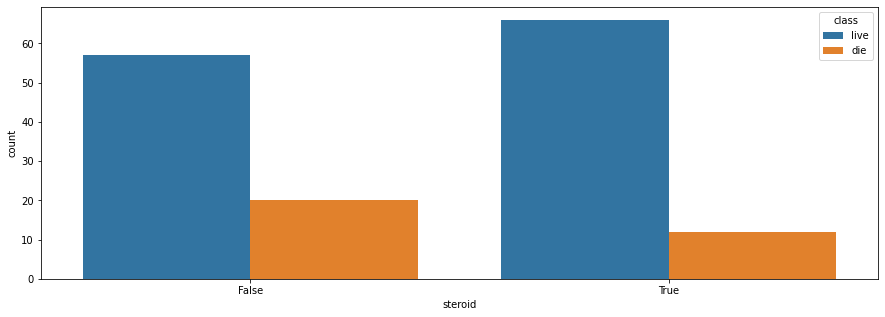

In [186]:
plt.figure(figsize=(15,5))
sns.countplot(x='steroid',data = df2, hue = 'class')
plt.show()

In [190]:
df.groupby(['steroid','class'])['class'].count()

steroid  class
False    die      20
         live     56
True     die      12
         live     66
Name: class, dtype: int64

In [192]:
df.groupby(['sex','steroid','class'])['class'].count()

sex     steroid  class
female  False    die      20
                 live     47
        True     die      12
                 live     59
male    False    live      9
        True     live      7
Name: class, dtype: int64

###  Steroid
steroid count : True - 78 & False - 77 <br>
percentage count : True - 50.33 % and False - 49.67% <br>
Total die -  32 <br>
steroid with die count : False - 20 & True - 12  <br>
steroid with Gender - Female with steroid takens are 71 members , Female with steroid non takens are 67 member
steroid with die percentage among total percentage: False - 12 % & True -  7.7 %   <br>
steroid with die % among in total die  : False - 62.5 % & True - 37.5 % <br>

### Antivirals

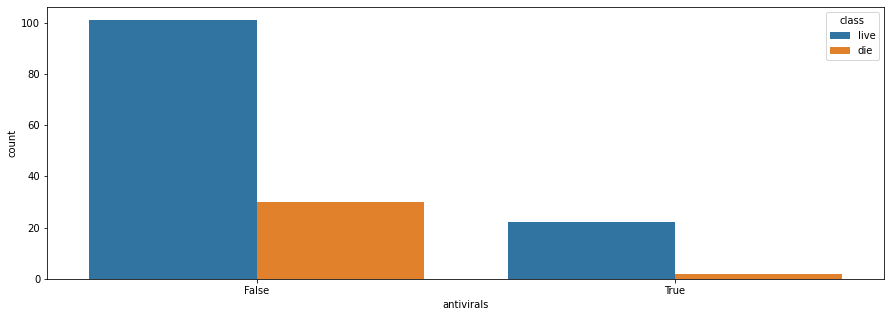

In [199]:
plt.figure(figsize=(15,5))
sns.countplot(x='antivirals',data = df2, hue = 'class')
plt.show()

In [209]:
df.groupby(['sex','antivirals','class'])['class'].count()

sex     antivirals  class
female  False       die      30
                    live     89
        True        die       2
                    live     18
male    False       live     12
        True        live      4
Name: class, dtype: int64

In [211]:
categorical_data.groupby(["sex"])["antivirals"].value_counts(normalize=True)*100

sex     antivirals
female  False         85.611511
        True          14.388489
male    False         75.000000
        True          25.000000
Name: antivirals, dtype: float64

### 
female Those who dont taken antivirals are mostly affected and died  : die count - 30 out of 32 alive are  89
female those who taken antivirals  and died are only 2 members : die count  2 out of 32 and alive are 18

In [213]:
categorical_data.columns

Index(['sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'histology', 'class'],
      dtype='object')

###  Malise

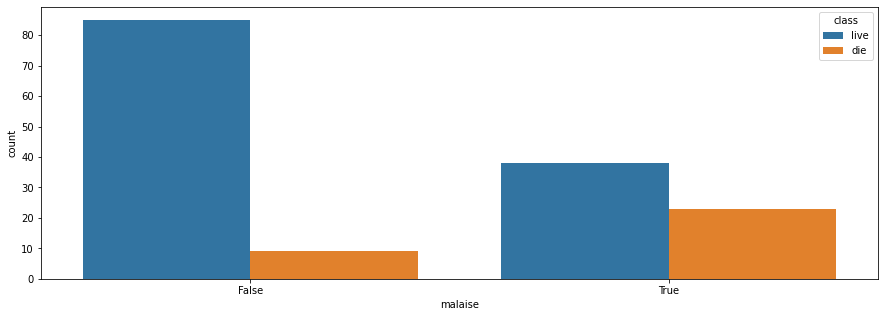

In [217]:
plt.figure(figsize=(15,5))
sns.countplot(x='malaise',data = df2, hue = 'class')
plt.show()

In [221]:
categorical_data.groupby(["sex"])["malaise"].value_counts(normalize=True)*100

sex     malaise
female  False      61.151079
        True       38.848921
male    False      56.250000
        True       43.750000
Name: malaise, dtype: float64

In [224]:
categorical_data.groupby(["class","sex","malaise"])["class"].count()

class  sex     malaise
die    female  False       9
               True       23
live   female  False      76
               True       31
       male    False       9
               True        7
Name: class, dtype: int64

### 
female those who has malaise and died are 23

In [178]:
import plotly.express as px
import plotly.graph_objects as go

In [182]:
df2.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [183]:
from plotly.subplots import make_subplots
features = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'histology', 'class']
rows = 3
cols = 5
fig = make_subplots(rows=rows, cols=cols, subplot_titles=features)
x, y = np.meshgrid(np.arange(rows)+1, np.arange(cols)+1)
count  = 0
for row, col in zip(x.T.reshape(-1), y.T.reshape(-1)):
    fig.add_trace(
        go.Histogram(x = df2[features[count]].values),
        row = row,
        col = col
    )
    count+=1
    
fig.update_layout(height=900, width=900, title_text='Feature Distribution', showlegend=False)
fig.show()

### Numerical Data

In [218]:
numerical_data

,age,bilirubin,alk_phosphate,sgot,albumin,protime
0,30,1.0,85,18,4.0,50
1,50,0.9,135,42,3.5,41
2,78,0.7,96,32,4.0,46
3,31,0.7,46,52,4.0,80
4,34,1.0,215,200,4.0,31
...,...,...,...,...,...,...
150,46,7.6,109,242,3.3,50
151,44,0.9,126,142,4.3,50
152,61,0.8,75,20,4.1,31
153,53,1.5,81,19,4.1,48


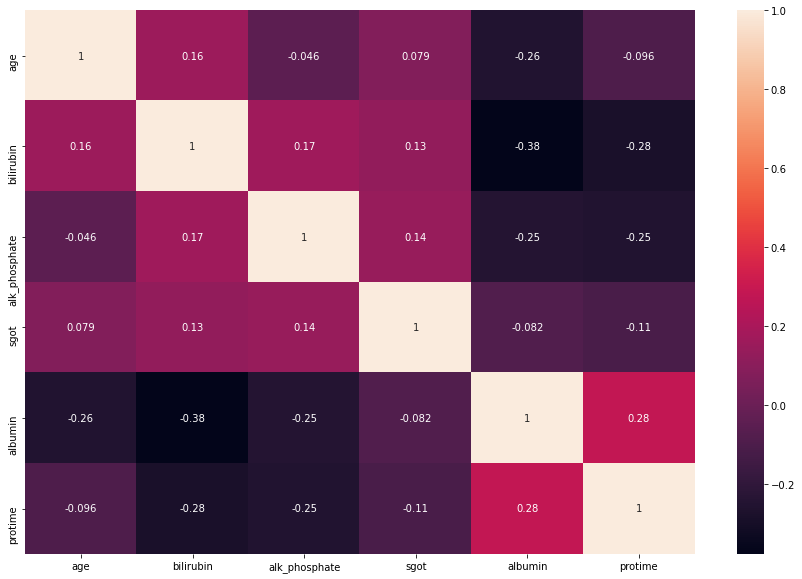

In [219]:
#Correlation Plot
plt.figure(figsize=(15,10))
sns.heatmap(numerical_data.corr(), annot=True)
plt.show()

In [214]:
from scipy.stats import pearsonr

In [216]:
from scipy.stats import pearsonr
for i in numerical_data.columns:
    print(i)
    
    for j in numerical_data.columns:
        if i != j:
            
            p = pearsonr(numerical_data[i],numerical_data[j])
            if p[1]>= 0.05:
                print(j,"corr----->",p[0],"prob---->",p[1],'----> insignificant')
            else:
                print(j,"corr----->",p[0],"prob---->",p[1],'----> significant')
    print("\n")

age
bilirubin corr-----> 0.1581115449404588 prob----> 0.04942388266525672 ----> significant
alk_phosphate corr-----> -0.04633243110582504 prob----> 0.567001947829584 ----> insignificant
sgot corr-----> 0.07924945198909641 prob----> 0.32698549148672545 ----> insignificant
albumin corr-----> -0.25640414009196794 prob----> 0.0012802205137268383 ----> significant
protime corr-----> -0.09584853592824175 prob----> 0.2354726953474685 ----> insignificant


bilirubin
age corr-----> 0.1581115449404588 prob----> 0.04942388266525672 ----> significant
alk_phosphate corr-----> 0.1706703119958926 prob----> 0.03373441018933744 ----> significant
sgot corr-----> 0.12785399004868211 prob----> 0.11287587785265914 ----> insignificant
albumin corr-----> -0.3757949937473294 prob----> 1.4460671415340087e-06 ----> significant
protime corr-----> -0.2802402095078038 prob----> 0.00041280481090418187 ----> significant


alk_phosphate
age corr-----> -0.04633243110582504 prob----> 0.567001947829584 ----> insignifica

### Age

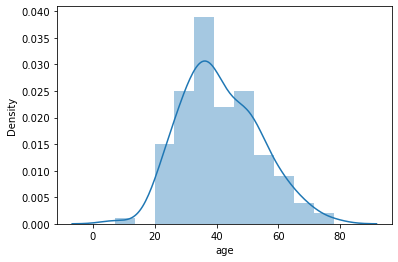

In [136]:
sns.distplot(df2['age'])
plt.show()

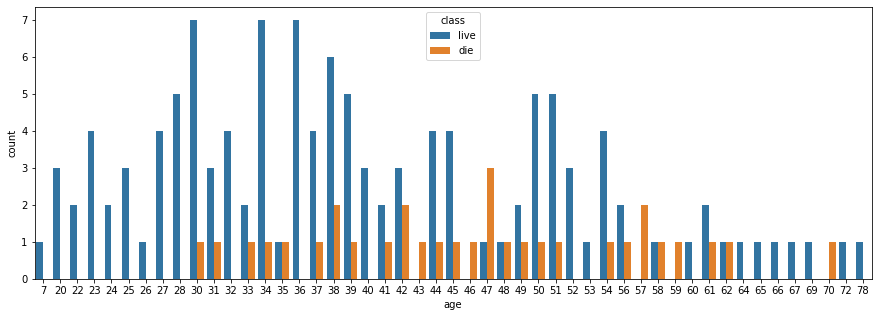

In [152]:
plt.figure(figsize=(15,5))
sns.countplot(x='age',data = df2, hue = 'class')
plt.show()

In [165]:
df.groupby(['sex','age','class'])['class'].count()

sex     age  class
female  7    live     1
        20   live     2
        22   live     1
        23   live     4
        24   live     2
        25   live     2
        27   live     4
        28   live     4
        30   die      1
             live     6
        31   die      1
             live     3
        32   live     4
        33   die      1
             live     2
        34   die      1
             live     5
        35   die      1
             live     1
        36   live     7
        37   die      1
             live     4
        38   die      2
             live     6
        39   die      1
             live     5
        40   live     3
        41   die      1
             live     1
        42   die      2
             live     3
        43   die      1
        44   die      1
             live     4
        45   die      1
             live     3
        46   die      1
        47   die      3
             live     1
        48   die      1
             live    

Only females and those are age above 30 are died here 

### Bilirubin

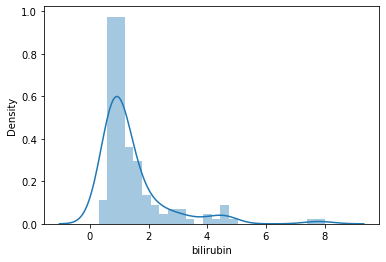

In [167]:
sns.distplot(df['bilirubin'])
plt.show()

### 
Right skewed

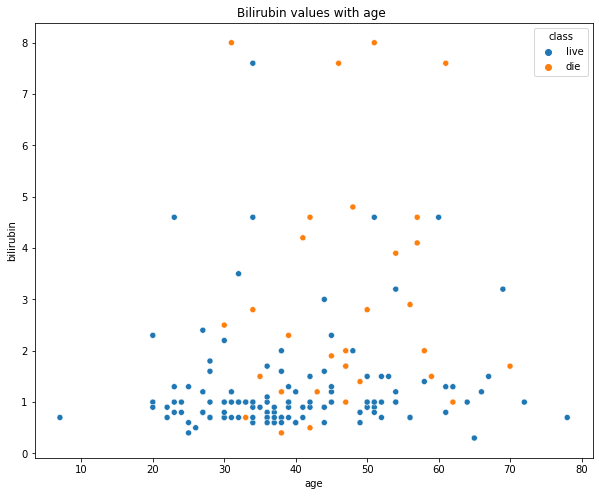

In [225]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age',y='bilirubin',data = df2,hue = 'class')
plt.title('Bilirubin values with age ')
plt.show()

Bilirubin is a yellowish substance that is created by the breakdown (destruction) of hemoglobin, a major component of red blood cells.
Levels of bilirubin in the blood go up and down in patients with hepatitis C.
High levels of bilirubin can cause jaundice. <b><i>Females  died 28 out of 134 those who has bilirubin levels 1 to 5 died  and died 4 out of 5 those who has bilirubin level 7 to 8 </i></b>

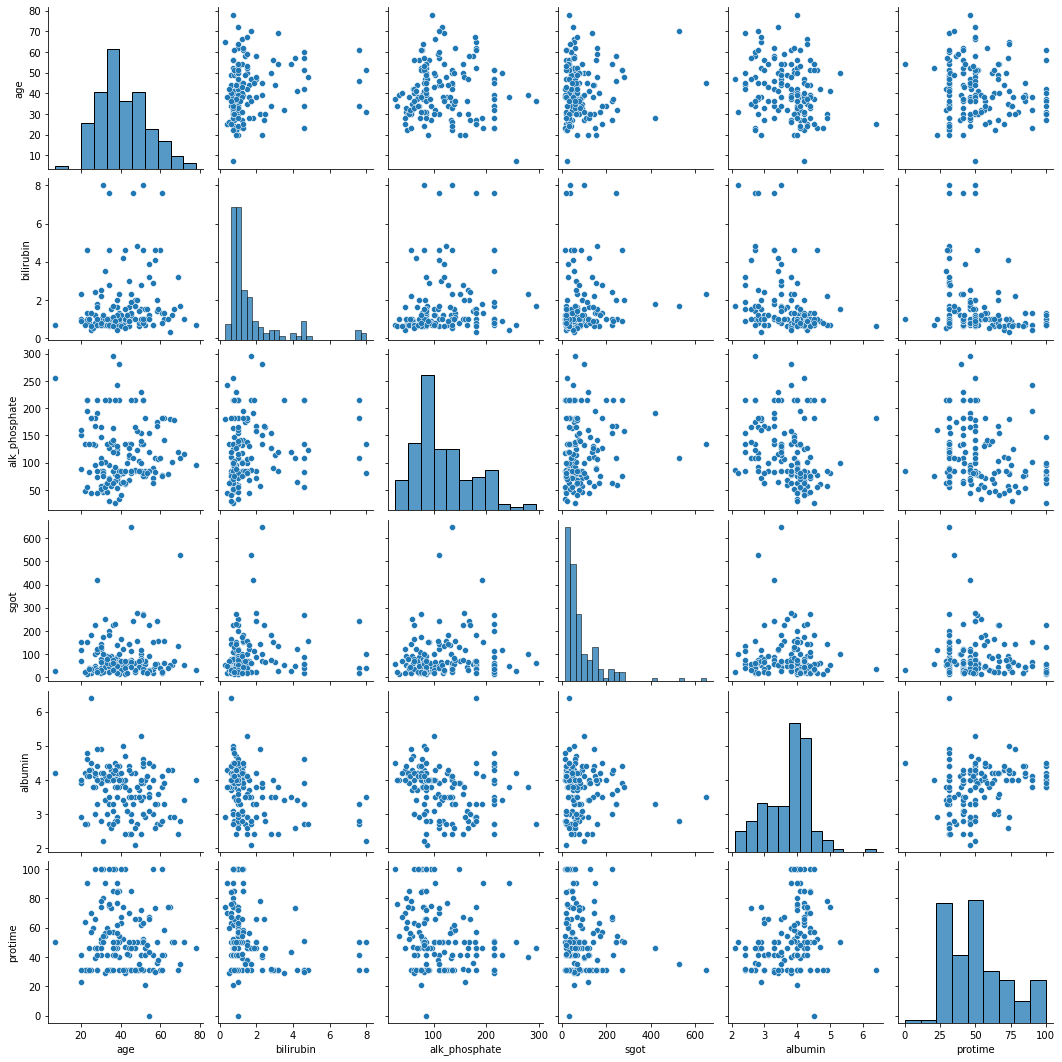

In [227]:
sns.pairplot(numerical_data)

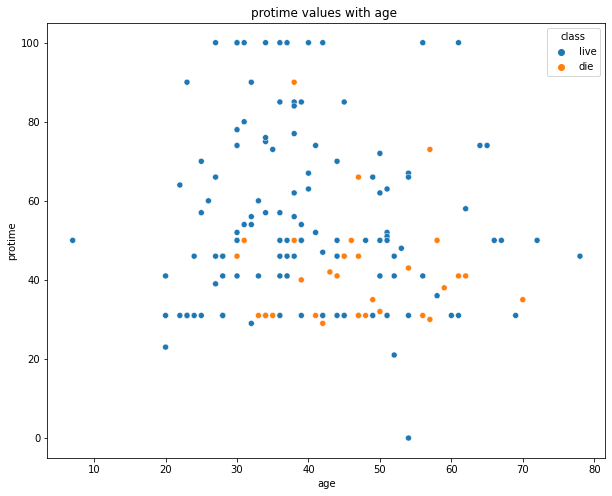

In [229]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age',y='protime',data = df2,hue = 'class')
plt.title('protime values with age ')
plt.show()

### 
The prothrombin time (PT) is one way of measuring how long it takes blood to form a clot, and it is measured .
 females Those who have protime of 30 to 60  seconds and age between 30 to 70 are died 


In [230]:
numerical_data.columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime'], dtype='object')

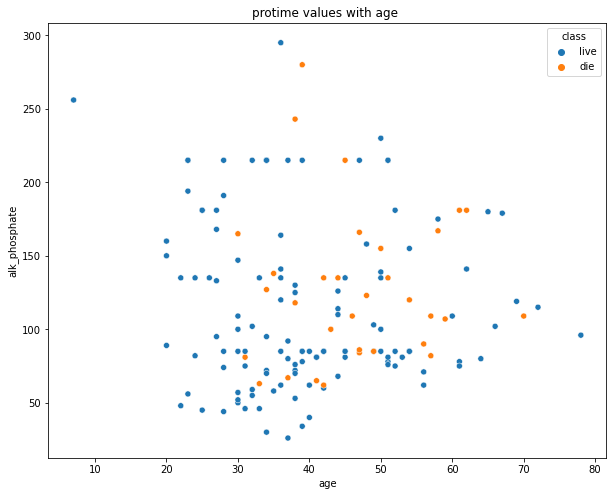

In [231]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age',y='alk_phosphate',data = df2,hue = 'class')
plt.title('alk phosphate values with age ')
plt.show()

### 
Alkaline phosphatase (often shortened to alk phos) is an enzyme made in liver cells and bile ducts.